<a href="https://colab.research.google.com/github/ushifali/Twiter_Analysis_Abortion_Law_US/blob/main/EDA%20of%20unsupervised%20abortion%20tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
#Here im utilizing data i got from VICINITY which is unsupervised

In [54]:
#has user data
csv1 = pd.read_csv("/content/final.csv")

#has tweet data
csv2 =  pd.read_csv("/content/Final Datasetfinal.csv")

merged_data = csv1.merge(csv2,on=["Screen Name"])

merged_data.to_csv('final_unsupervised.csv')

In [55]:
train_data = pd.read_csv("/content/final_unsupervised.csv",low_memory=False)
train_data.head()

,Unnamed: 0,Unnamed: 0_x,User Id,Name_x,Screen Name,UTC_x,Created At_x,Followers,Following,Favorites_x,...,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,0,0,727580305108938752,WomensPowerCen,WomensPowerCen,2016-05-03T19:27:17.000Z,Tue May 03 19:27:17 +0000 2016,2979,4783,211,...,"<a href=""https://www.tweetsuite.com/"" rel=""nof...",Tweet,http://bit.ly/zjuoeV,5,0,photo,https://pbs.twimg.com/media/ChyLFIQXAAADJxS.jpg,NaN,NaN,NaN
1,1,0,727580305108938752,WomensPowerCen,WomensPowerCen,2016-05-03T19:27:17.000Z,Tue May 03 19:27:17 +0000 2016,2979,4783,211,...,"<a href=""https://www.tweetsuite.com/"" rel=""nof...",Tweet,http://bit.ly/zjuoeV,5,0,photo,https://pbs.twimg.com/media/ChyLFIQXAAADJxS.jpg,NaN,NaN,NaN
2,2,0,727580305108938752,WomensPowerCen,WomensPowerCen,2016-05-03T19:27:17.000Z,Tue May 03 19:27:17 +0000 2016,2979,4783,211,...,"<a href=""https://www.tweetsuite.com/"" rel=""nof...",Tweet,http://bit.ly/zjuoeV,5,0,photo,https://pbs.twimg.com/media/ChyLFIQXAAADJxS.jpg,NaN,NaN,NaN
3,3,670,727580305108938752,WomensPowerCen,WomensPowerCen,2016-05-03T19:27:17.000Z,Tue May 03 19:27:17 +0000 2016,2978,4783,211,...,"<a href=""https://www.tweetsuite.com/"" rel=""nof...",Tweet,http://bit.ly/zjuoeV,5,0,photo,https://pbs.twimg.com/media/ChyLFIQXAAADJxS.jpg,NaN,NaN,NaN
4,4,670,727580305108938752,WomensPowerCen,WomensPowerCen,2016-05-03T19:27:17.000Z,Tue May 03 19:27:17 +0000 2016,2978,4783,211,...,"<a href=""https://www.tweetsuite.com/"" rel=""nof...",Tweet,http://bit.ly/zjuoeV,5,0,photo,https://pbs.twimg.com/media/ChyLFIQXAAADJxS.jpg,NaN,NaN,NaN


In [56]:
len(train_data)

55500

In [57]:
train_data.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'User Id', 'Name_x', 'Screen Name',
       'UTC_x', 'Created At_x', 'Followers', 'Following', 'Favorites_x',
       'Tweets', 'Lists', 'Bio', 'Location', 'URL', 'Verified',
       'Default Profile', 'Unnamed: 0_y', 'Unnamed: 0.1', 'Tweet Id', 'Text',
       'Name_y', 'UTC_y', 'Created At_y', 'Favorites_y', 'Retweets',
       'Language', 'Client', 'Tweet Type', 'URLs', 'Hashtags', 'Mentions',
       'Media Type', 'Media URLs', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18'],
      dtype='object')

In [58]:
train_data.drop([ 'Unnamed: 0', 'Unnamed: 0_x', 'User Id', 'Default Profile', 'Unnamed: 0_y', 'Unnamed: 0.1', 'Tweet Id', 'Media Type', 'Media URLs', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18','Name_y', 'UTC_y', 'Created At_y', 'Favorites_y','Name_x', 'Verified', 'Language', 'Lists'], axis=1, inplace=True)

In [59]:
train_data.columns

Index(['Screen Name', 'UTC_x', 'Created At_x', 'Followers', 'Following',
       'Favorites_x', 'Tweets', 'Bio', 'Location', 'URL', 'Text', 'Retweets',
       'Client', 'Tweet Type', 'URLs', 'Hashtags', 'Mentions'],
      dtype='object')

In [60]:
train_data.shape

(55500, 17)

In [61]:
train_data.drop_duplicates(subset='Text', inplace=True)

In [62]:
#so we deleted duplicates dunno how it got created n the first place btw
train_data.columns

Index(['Screen Name', 'UTC_x', 'Created At_x', 'Followers', 'Following',
       'Favorites_x', 'Tweets', 'Bio', 'Location', 'URL', 'Text', 'Retweets',
       'Client', 'Tweet Type', 'URLs', 'Hashtags', 'Mentions'],
      dtype='object')

In [65]:
pd.set_option('max_colwidth', 800)
train_data['Text'].head()

0                                                                                                                                                                                        #cheater #Scandal #prochoice Knowledge is power site:Sexual #Revolution is bringing #sexodus https://t.co/ExEG6LwCvg https://t.co/Olw3RF5OPL
2                                                                                                                                                                                        #cheater #Scandal #prochoice Knowledge is power site:Sexual #Revolution is bringing #sexodus https://t.co/ExEG6LNFxg https://t.co/Olw3RFmRRL
9     RT @ewtnDE : Der Samstag auf dem Kongress Leben.Würde 2022 startet um 9.00 Uhr mit einem tollen Plenum:\nLeib – Leben – Liebe Von welcher Würde spricht der Leib? -Prof. Dr. Hanna-Barbara Gerl-Falkovitz\nAlle Infos zum Tag hier:\nhttps://t.co/6ole9ujYJC \nSchaltet ein!\n\n#ewtntv #prolife #leben https://t.co/F0HM1RMpv9
10                    

In [64]:
train_data.shape

(3389, 17)

In [66]:
#STEP 2
#Remove Punctions ans stopwords
%pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

print(stopwords.words('english'))


stop_words = set(stopwords.words('english'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [67]:
# import string library function for punctuation
import string 

# import Regular Expression 
import re 

#function to clean text removing stopwords
def clean_text(text):
    text = ' '.join( [word for word in text.split() if len(word)>1] )
    text = str(text).lower()    
    text = re.sub(r"https:(\/\/t\.co\/([A-Za-z0-9]|[A-Za-z]){10})", "", text)
    pat = r"[{}]".format(string.punctuation) 
    text = re.sub(pat, '', text) 
    text = re.sub('  +', '', text)     
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*','', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub('@\.', '', text)    
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text) 
    
    # remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])

    #remove single characters
    text = ' '.join([word for word in text.split() if len(word) > 1] )
    text = re.sub('\s*\\b([a-z]|[a-z]{2})\\b', '', text)
    #to remove single secial characters
    text = re.sub('\?|\.|\!|\/|\;|\:|\'|\+|\-|\*|\"', '', text)
    text = re.sub('’|“|”', '', text)
    return text
#ALSO IN THIS FUNCTION IM PRETTY SURE MANY ARE REPEATED. NOT GONNA CHCEK WHICH IS OBSELETE

In [68]:
print(train_data['Text'].values[0])
print('-'*100)
print(clean_text(train_data['Text'].values[0]))


train_data['clean'] = train_data['Text'].apply(lambda row: clean_text(row))
train_data.head()

#cheater #Scandal #prochoice Knowledge is power site:Sexual #Revolution is bringing #sexodus https://t.co/ExEG6LwCvg https://t.co/Olw3RF5OPL
----------------------------------------------------------------------------------------------------
cheater scandal prochoice knowledge power sitesexual revolution bringing sexodus


,Screen Name,UTC_x,Created At_x,Followers,Following,Favorites_x,Tweets,Bio,Location,URL,Text,Retweets,Client,Tweet Type,URLs,Hashtags,Mentions,clean
0,WomensPowerCen,2016-05-03T19:27:17.000Z,Tue May 03 19:27:17 +0000 2016,2979,4783,211,214887,Via UTube https://t.co/FLl7KHSUKO book https://t.co/H3cE6jfcFH FB https://t.co/uAdFJsB2uu G+https://t.co/s6ZMJmP2fj & blog we aid women Follow & get 3Dicon inDM,NaN,http://www.womenspowerbook.org,#cheater #Scandal #prochoice Knowledge is power site:Sexual #Revolution is bringing #sexodus https://t.co/ExEG6LwCvg https://t.co/Olw3RF5OPL,0,"<a href=""https://www.tweetsuite.com/"" rel=""nofollow"">Tweet Suite</a>",Tweet,http://bit.ly/zjuoeV,5,0,cheater scandal prochoice knowledge power sitesexual revolution bringing sexodus
2,WomensPowerCen,2016-05-03T19:27:17.000Z,Tue May 03 19:27:17 +0000 2016,2979,4783,211,214887,Via UTube https://t.co/FLl7KHSUKO book https://t.co/H3cE6jfcFH FB https://t.co/uAdFJsB2uu G+https://t.co/s6ZMJmP2fj & blog we aid women Follow & get 3Dicon inDM,NaN,http://www.womenspowerbook.org,#cheater #Scandal #prochoice Knowledge is power site:Sexual #Revolution is bringing #sexodus https://t.co/ExEG6LNFxg https://t.co/Olw3RFmRRL,0,"<a href=""https://www.tweetsuite.com/"" rel=""nofollow"">Tweet Suite</a>",Tweet,http://bit.ly/zjuoeV,5,0,cheater scandal prochoice knowledge power sitesexual revolution bringing sexodus
9,Abtreibpranger,2019-07-10T20:17:59.000Z,Wed Jul 10 20:17:59 +0000 2019,2409,5001,55030,108125,"Schwangere anprangern ist für mich Tabu;Anprangern, was Schwangeren ""Ja zum Kind"" erschwert; https://t.co/WouBj9JE4D;Florian Kren,vh.,3 K,Dr.rer.nat.,Patenta.,RK;",München,NaN,RT @ewtnDE : Der Samstag auf dem Kongress Leben.Würde 2022 startet um 9.00 Uhr mit einem tollen Plenum:\nLeib – Leben – Liebe Von welcher Würde spricht der Leib? -Prof. Dr. Hanna-Barbara Gerl-Falkovitz\nAlle Infos zum Tag hier:\nhttps://t.co/6ole9ujYJC \nSchaltet ein!\n\n#ewtntv #prolife #leben https://t.co/F0HM1RMpv9,0,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",Retweet,https://buff.ly/3zZSX1u,3,0,ewtnde der samstag auf dem kongress lebenwürde startet uhr mit einem tollen plenum leib leben liebe von welcher würde spricht der leib prof hannabarbara gerlfalkovitz alle infos zum tag hierschaltet ein ewtntv prolife leben
10,Abtreibpranger,2019-07-10T20:17:59.000Z,Wed Jul 10 20:17:59 +0000 2019,2409,5001,55030,108125,"Schwangere anprangern ist für mich Tabu;Anprangern, was Schwangeren ""Ja zum Kind"" erschwert; https://t.co/WouBj9JE4D;Florian Kren,vh.,3 K,Dr.rer.nat.,Patenta.,RK;",München,NaN,"RT @ewtnDE : Heute Abend um 20.00 Uhr geht es los. Wir übertragen die Eröffnung des Kongresses Leben.Würde 2022, mit zahlreichen wertvollen Beiträgen:\nAlle Infos hier:\nhttps://t.co/6ole9ujYJC \nSchaltet ein!\n\n#ewtntv #prolife #leben #wuerde #jedermenschistwertvoll https://t.co/uER8kaH9KI",0,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",Retweet,https://buff.ly/3zZSX1u,5,0,ewtnde heute abend uhr geht los wir übertragen die eröffnung des kongresses lebenwürde mit zahlreichen wertvollen beiträgen alle infos hierschaltet ein ewtntv prolife leben wuerde jedermenschistwertvoll
11,Abtreibpranger,2019-07-10T20:17:59.000Z,Wed Jul 10 20:17:59 +0000 2019,2409,5001,55030,108125,"Schwangere anprangern ist für mich Tabu;Anprangern, was Schwangeren ""Ja zum Kind"" erschwert; https://t.co/WouBj9JE4D;Florian Kren,vh.,3 K,Dr.rer.nat.,Patenta.,RK;",München,NaN,"RT @sakrumverum : Wäre heute nicht Sonntag, würden in Deutschland wieder rund 275 Kinder getötet werden.\n#prochoice #Ableismus #Misogynie",0,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",Retweet,NaN,3,0,sakrumverum wäre heute nicht sonntag würden deutschland wieder rund kinder getötet werden prochoice ableismus misogynie


In [69]:
#STEP 3
#LEMMANTIZE IT
# Now we will tokenize our cleaned sentences and then tag each word with POS - tagging. It is necessary for lemmatization
# In corpus linguistics, part-of-speech tagging (POS tagging or PoS tagging or POST), also called grammatical tagging 
# is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech.

import nltk
nltk.download('punkt')

import nltk
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize

train_data['tokenized'] = train_data['clean'].apply(lambda row: word_tokenize(row))
train_data['pos_tags'] = train_data['tokenized'].apply(lambda row: nltk.tag.pos_tag(row))
train_data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Screen Name,UTC_x,Created At_x,Followers,Following,Favorites_x,Tweets,Bio,Location,URL,Text,Retweets,Client,Tweet Type,URLs,Hashtags,Mentions,clean,tokenized,pos_tags
0,WomensPowerCen,2016-05-03T19:27:17.000Z,Tue May 03 19:27:17 +0000 2016,2979,4783,211,214887,Via UTube https://t.co/FLl7KHSUKO book https://t.co/H3cE6jfcFH FB https://t.co/uAdFJsB2uu G+https://t.co/s6ZMJmP2fj & blog we aid women Follow & get 3Dicon inDM,NaN,http://www.womenspowerbook.org,#cheater #Scandal #prochoice Knowledge is power site:Sexual #Revolution is bringing #sexodus https://t.co/ExEG6LwCvg https://t.co/Olw3RF5OPL,0,"<a href=""https://www.tweetsuite.com/"" rel=""nofollow"">Tweet Suite</a>",Tweet,http://bit.ly/zjuoeV,5,0,cheater scandal prochoice knowledge power sitesexual revolution bringing sexodus,"[cheater, scandal, prochoice, knowledge, power, sitesexual, revolution, bringing, sexodus]","[(cheater, NN), (scandal, NN), (prochoice, NN), (knowledge, NN), (power, NN), (sitesexual, JJ), (revolution, NN), (bringing, VBG), (sexodus, NN)]"
2,WomensPowerCen,2016-05-03T19:27:17.000Z,Tue May 03 19:27:17 +0000 2016,2979,4783,211,214887,Via UTube https://t.co/FLl7KHSUKO book https://t.co/H3cE6jfcFH FB https://t.co/uAdFJsB2uu G+https://t.co/s6ZMJmP2fj & blog we aid women Follow & get 3Dicon inDM,NaN,http://www.womenspowerbook.org,#cheater #Scandal #prochoice Knowledge is power site:Sexual #Revolution is bringing #sexodus https://t.co/ExEG6LNFxg https://t.co/Olw3RFmRRL,0,"<a href=""https://www.tweetsuite.com/"" rel=""nofollow"">Tweet Suite</a>",Tweet,http://bit.ly/zjuoeV,5,0,cheater scandal prochoice knowledge power sitesexual revolution bringing sexodus,"[cheater, scandal, prochoice, knowledge, power, sitesexual, revolution, bringing, sexodus]","[(cheater, NN), (scandal, NN), (prochoice, NN), (knowledge, NN), (power, NN), (sitesexual, JJ), (revolution, NN), (bringing, VBG), (sexodus, NN)]"
9,Abtreibpranger,2019-07-10T20:17:59.000Z,Wed Jul 10 20:17:59 +0000 2019,2409,5001,55030,108125,"Schwangere anprangern ist für mich Tabu;Anprangern, was Schwangeren ""Ja zum Kind"" erschwert; https://t.co/WouBj9JE4D;Florian Kren,vh.,3 K,Dr.rer.nat.,Patenta.,RK;",München,NaN,RT @ewtnDE : Der Samstag auf dem Kongress Leben.Würde 2022 startet um 9.00 Uhr mit einem tollen Plenum:\nLeib – Leben – Liebe Von welcher Würde spricht der Leib? -Prof. Dr. Hanna-Barbara Gerl-Falkovitz\nAlle Infos zum Tag hier:\nhttps://t.co/6ole9ujYJC \nSchaltet ein!\n\n#ewtntv #prolife #leben https://t.co/F0HM1RMpv9,0,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",Retweet,https://buff.ly/3zZSX1u,3,0,ewtnde der samstag auf dem kongress lebenwürde startet uhr mit einem tollen plenum leib leben liebe von welcher würde spricht der leib prof hannabarbara gerlfalkovitz alle infos zum tag hierschaltet ein ewtntv prolife leben,"[ewtnde, der, samstag, auf, dem, kongress, lebenwürde, startet, uhr, mit, einem, tollen, plenum, leib, leben, liebe, von, welcher, würde, spricht, der, leib, prof, hannabarbara, gerlfalkovitz, alle, infos, zum, tag, hierschaltet, ein, ewtntv, prolife, leben]","[(ewtnde, JJ), (der, NN), (samstag, NN), (auf, NN), (dem, NN), (kongress, NN), (lebenwürde, NN), (startet, NN), (uhr, JJ), (mit, NN), (einem, NN), (tollen, VBN), (plenum, NN), (leib, NN), (leben, NN), (liebe, NN), (von, IN), (welcher, JJR), (würde, NN), (spricht, NN), (der, NN), (leib, NN), (prof, NN), (hannabarbara, NN), (gerlfalkovitz, NN), (alle, NN), (infos, NN), (zum, NN), (tag, NN), (hierschaltet, NN), (ein, NN), (ewtntv, JJ), (prolife, NN), (leben, NN)]"
10,Abtreibpranger,2019-07-10T20:17:59.000Z,Wed Jul 10 20:17:59 +0000 2019,2409,5001,55030,108125,"Schwangere anprangern ist für mich Tabu;Anprangern, was Schwangeren ""Ja zum Kind"" erschwert; https://t.co/WouBj9JE4D;Florian Kren,vh.,3 K,Dr.rer.nat.,Patenta.,RK;",München,NaN,"RT @ewtnDE : Heute Abend um 20.00 Uhr geht es los. Wir übertragen die Eröffnung des Kongresses Leben.Würde 2022, mit zahlreichen wertvollen Beiträgen:\nAlle Infos hier:\n

In [70]:
#USING wordnet tags
#https://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        morphy_tag = {'NN':'n', 'JJ':'a','VB':'v', 'RB':'r'}
        try:
          return morphy_tag[treebank_tag[:2]]
        except:
          return 'n' 

    
train_data['wordnet_pos'] = train_data['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) 
                                                               for (word, pos_tag) in x])
train_data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Screen Name,UTC_x,Created At_x,Followers,Following,Favorites_x,Tweets,Bio,Location,URL,...,Retweets,Client,Tweet Type,URLs,Hashtags,Mentions,clean,tokenized,pos_tags,wordnet_pos
0,WomensPowerCen,2016-05-03T19:27:17.000Z,Tue May 03 19:27:17 +0000 2016,2979,4783,211,214887,Via UTube https://t.co/FLl7KHSUKO book https://t.co/H3cE6jfcFH FB https://t.co/uAdFJsB2uu G+https://t.co/s6ZMJmP2fj & blog we aid women Follow & get 3Dicon inDM,NaN,http://www.womenspowerbook.org,...,0,"<a href=""https://www.tweetsuite.com/"" rel=""nofollow"">Tweet Suite</a>",Tweet,http://bit.ly/zjuoeV,5,0,cheater scandal prochoice knowledge power sitesexual revolution bringing sexodus,"[cheater, scandal, prochoice, knowledge, power, sitesexual, revolution, bringing, sexodus]","[(cheater, NN), (scandal, NN), (prochoice, NN), (knowledge, NN), (power, NN), (sitesexual, JJ), (revolution, NN), (bringing, VBG), (sexodus, NN)]","[(cheater, n), (scandal, n), (prochoice, n), (knowledge, n), (power, n), (sitesexual, a), (revolution, n), (bringing, v), (sexodus, n)]"
2,WomensPowerCen,2016-05-03T19:27:17.000Z,Tue May 03 19:27:17 +0000 2016,2979,4783,211,214887,Via UTube https://t.co/FLl7KHSUKO book https://t.co/H3cE6jfcFH FB https://t.co/uAdFJsB2uu G+https://t.co/s6ZMJmP2fj & blog we aid women Follow & get 3Dicon inDM,NaN,http://www.womenspowerbook.org,...,0,"<a href=""https://www.tweetsuite.com/"" rel=""nofollow"">Tweet Suite</a>",Tweet,http://bit.ly/zjuoeV,5,0,cheater scandal prochoice knowledge power sitesexual revolution bringing sexodus,"[cheater, scandal, prochoice, knowledge, power, sitesexual, revolution, bringing, sexodus]","[(cheater, NN), (scandal, NN), (prochoice, NN), (knowledge, NN), (power, NN), (sitesexual, JJ), (revolution, NN), (bringing, VBG), (sexodus, NN)]","[(cheater, n), (scandal, n), (prochoice, n), (knowledge, n), (power, n), (sitesexual, a), (revolution, n), (bringing, v), (sexodus, n)]"
9,Abtreibpranger,2019-07-10T20:17:59.000Z,Wed Jul 10 20:17:59 +0000 2019,2409,5001,55030,108125,"Schwangere anprangern ist für mich Tabu;Anprangern, was Schwangeren ""Ja zum Kind"" erschwert; https://t.co/WouBj9JE4D;Florian Kren,vh.,3 K,Dr.rer.nat.,Patenta.,RK;",München,NaN,...,0,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",Retweet,https://buff.ly/3zZSX1u,3,0,ewtnde der samstag auf dem kongress lebenwürde startet uhr mit einem tollen plenum leib leben liebe von welcher würde spricht der leib prof hannabarbara gerlfalkovitz alle infos zum tag hierschaltet ein ewtntv prolife leben,"[ewtnde, der, samstag, auf, dem, kongress, lebenwürde, startet, uhr, mit, einem, tollen, plenum, leib, leben, liebe, von, welcher, würde, spricht, der, leib, prof, hannabarbara, gerlfalkovitz, alle, infos, zum, tag, hierschaltet, ein, ewtntv, prolife, leben]","[(ewtnde, JJ), (der, NN), (samstag, NN), (auf, NN), (dem, NN), (kongress, NN), (lebenwürde, NN), (startet, NN), (uhr, JJ), (mit, NN), (einem, NN), (tollen, VBN), (plenum, NN), (leib, NN), (leben, NN), (liebe, NN), (von, IN), (welcher, JJR), (würde, NN), (spricht, NN), (der, NN), (leib, NN), (prof, NN), (hannabarbara, NN), (gerlfalkovitz, NN), (alle, NN), (infos, NN), (zum, NN), (tag, NN), (hierschaltet, NN), (ein, NN), (ewtntv, JJ), (prolife, NN), (leben, NN)]","[(ewtnde, a), (der, n), (samstag, n), (auf, n), (dem, n), (kongress, n), (lebenwürde, n), (startet, n), (uhr, a), (mit, n), (einem, n), (tollen, v), (plenum, n), (leib, n), (leben, n), (liebe, n), (von, n), (welcher, a), (würde, n), (spricht, n), (der, n), (leib, n), (prof, n), (hannabarbara, n), (gerlfalkovitz, n), (alle, n), (infos, n), (zum, n), (tag, n), (hierschaltet, n), (ein, n), (ewtntv, a), (prolife, n), (leben, n)]"
10,Abtreibpranger,2019-07-10T20:17:59.000Z,Wed Jul 10 20:17:59 +0000 2019,2409,5001,55030,108125,"Schwangere anprangern ist für mich Tabu;Anprangern, was Schwangeren ""Ja zum Kind"" erschwert; https://t.co/WouBj9JE4D;Florian Kren,vh.,3 K,Dr.rer.nat.,Patenta.,RK;",München,NaN,...,0,"<a href=""https://mobile.twitter.com

In [71]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

train_data['lemmatized'] = train_data['wordnet_pos'].apply(lambda x : [wnl.lemmatize(word, tag) for word, tag in x])

train_data.head()

,Screen Name,UTC_x,Created At_x,Followers,Following,Favorites_x,Tweets,Bio,Location,URL,...,Client,Tweet Type,URLs,Hashtags,Mentions,clean,tokenized,pos_tags,wordnet_pos,lemmatized
0,WomensPowerCen,2016-05-03T19:27:17.000Z,Tue May 03 19:27:17 +0000 2016,2979,4783,211,214887,Via UTube https://t.co/FLl7KHSUKO book https://t.co/H3cE6jfcFH FB https://t.co/uAdFJsB2uu G+https://t.co/s6ZMJmP2fj & blog we aid women Follow & get 3Dicon inDM,NaN,http://www.womenspowerbook.org,...,"<a href=""https://www.tweetsuite.com/"" rel=""nofollow"">Tweet Suite</a>",Tweet,http://bit.ly/zjuoeV,5,0,cheater scandal prochoice knowledge power sitesexual revolution bringing sexodus,"[cheater, scandal, prochoice, knowledge, power, sitesexual, revolution, bringing, sexodus]","[(cheater, NN), (scandal, NN), (prochoice, NN), (knowledge, NN), (power, NN), (sitesexual, JJ), (revolution, NN), (bringing, VBG), (sexodus, NN)]","[(cheater, n), (scandal, n), (prochoice, n), (knowledge, n), (power, n), (sitesexual, a), (revolution, n), (bringing, v), (sexodus, n)]","[cheater, scandal, prochoice, knowledge, power, sitesexual, revolution, bring, sexodus]"
2,WomensPowerCen,2016-05-03T19:27:17.000Z,Tue May 03 19:27:17 +0000 2016,2979,4783,211,214887,Via UTube https://t.co/FLl7KHSUKO book https://t.co/H3cE6jfcFH FB https://t.co/uAdFJsB2uu G+https://t.co/s6ZMJmP2fj & blog we aid women Follow & get 3Dicon inDM,NaN,http://www.womenspowerbook.org,...,"<a href=""https://www.tweetsuite.com/"" rel=""nofollow"">Tweet Suite</a>",Tweet,http://bit.ly/zjuoeV,5,0,cheater scandal prochoice knowledge power sitesexual revolution bringing sexodus,"[cheater, scandal, prochoice, knowledge, power, sitesexual, revolution, bringing, sexodus]","[(cheater, NN), (scandal, NN), (prochoice, NN), (knowledge, NN), (power, NN), (sitesexual, JJ), (revolution, NN), (bringing, VBG), (sexodus, NN)]","[(cheater, n), (scandal, n), (prochoice, n), (knowledge, n), (power, n), (sitesexual, a), (revolution, n), (bringing, v), (sexodus, n)]","[cheater, scandal, prochoice, knowledge, power, sitesexual, revolution, bring, sexodus]"
9,Abtreibpranger,2019-07-10T20:17:59.000Z,Wed Jul 10 20:17:59 +0000 2019,2409,5001,55030,108125,"Schwangere anprangern ist für mich Tabu;Anprangern, was Schwangeren ""Ja zum Kind"" erschwert; https://t.co/WouBj9JE4D;Florian Kren,vh.,3 K,Dr.rer.nat.,Patenta.,RK;",München,NaN,...,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",Retweet,https://buff.ly/3zZSX1u,3,0,ewtnde der samstag auf dem kongress lebenwürde startet uhr mit einem tollen plenum leib leben liebe von welcher würde spricht der leib prof hannabarbara gerlfalkovitz alle infos zum tag hierschaltet ein ewtntv prolife leben,"[ewtnde, der, samstag, auf, dem, kongress, lebenwürde, startet, uhr, mit, einem, tollen, plenum, leib, leben, liebe, von, welcher, würde, spricht, der, leib, prof, hannabarbara, gerlfalkovitz, alle, infos, zum, tag, hierschaltet, ein, ewtntv, prolife, leben]","[(ewtnde, JJ), (der, NN), (samstag, NN), (auf, NN), (dem, NN), (kongress, NN), (lebenwürde, NN), (startet, NN), (uhr, JJ), (mit, NN), (einem, NN), (tollen, VBN), (plenum, NN), (leib, NN), (leben, NN), (liebe, NN), (von, IN), (welcher, JJR), (würde, NN), (spricht, NN), (der, NN), (leib, NN), (prof, NN), (hannabarbara, NN), (gerlfalkovitz, NN), (alle, NN), (infos, NN), (zum, NN), (tag, NN), (hierschaltet, NN), (ein, NN), (ewtntv, JJ), (prolife, NN), (leben, NN)]","[(ewtnde, a), (der, n), (samstag, n), (auf, n), (dem, n), (kongress, n), (lebenwürde, n), (startet, n), (uhr, a), (mit, n), (einem, n), (tollen, v), (plenum, n), (leib, n), (leben, n), (liebe, n), (von, n), (welcher, a), (würde, n), (spricht, n), (der, n), (leib, n), (prof, n), (hannabarbara, n), (gerlfalkovitz, n), (alle, n), (infos, n), (zum, n), (tag, n), (hierschaltet, n), (ein, n), (ewtntv, a), (prolife, n), (leben, n)]","[ewtnde, der, samstag, auf, dem, kongress, lebenwürde, startet, uhr, mit, einem, tollen, plenum, leib, leben, liebe, von, welcher, würde, spri

In [72]:
words = []
for w in train_data['lemmatized'].values:
    words+=w

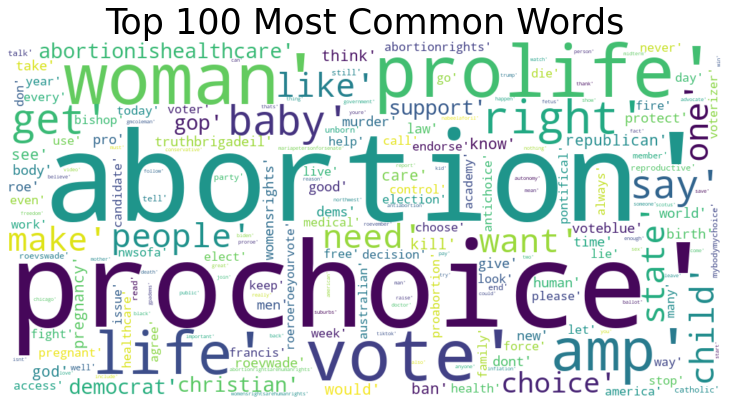

In [73]:
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
  
mostcommon = FreqDist(words).most_common(500)

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(20,6), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=35,y = 1)
plt.tight_layout(pad=2)
plt.show()